In [14]:
import sys
sys.path.append('ssynth-release-main/code/data_generation')

import util
import pandas as pd
import mitsuba as mi
import config
mi.set_variant('scalar_spectral')

from matplotlib import pyplot as plt
%matplotlib inline

- model: 100 skin models IDs (epidermis, vascular, dermis, hypodermis) ranging from 0 to 99 
- hairModel: 100 hair model IDs ranging from 0 to 99
- lesion: 20 lesion model IDs ranging from 1 to 20
- times: timepoint for the growing lesion ranging from 15 to 55 (the higher the time, the larger the lesion)
- lesionMat: 18 lesion material IDs ranging from 1 to 18 (the lesion material names are provided in `lesionMat`)
- fractionBlood: blood fraction value equal to 0.002, 0.005, 0.02, or 0.05
- melanosomes: melanosome fraction value ranging from 0.01 to 0.5 in steps of 0.01
- light: 19 light IDs ranging from 0 to 18 (the light names are provided in `exr_files` and are available as described in Section 2)
- hairAlbedoIndex: hair albedo index equal to 0, 1, or 2 (the values of each index are provided in `l_hair_albedo`)

In [31]:
id_model = 0
id_hairModel = 0

id_lesion = 1 # randomize
id_timePoint = 30 # randomize
id_lesionMat = 1 # randomize
id_fracBlood = 0.005 # randomize
id_mel = 0.15 #melanosome fraction value
id_light = 10 #light condition ID
id_hairAlbedo = 0 #hair albedo index
lesion_directory = 'data/supporting_data/materials/lesions_release/ver1'
# get material names
sel_lesionMat, sel_lightName, sel_hair_albedo = util.get_materials_names(id_lesionMat, id_light, id_hairAlbedo)

sDir = 'data/supporting_data/materials/'

util.sDir = sDir
util.sDir_hdri = 'data/supporting_data/hdri/'
# get render camera
cam_top = util.get_sensor()


In [32]:
scene_ref = util.render_image(id_model, id_hairModel, id_lesion, sel_lesionMat, id_fracBlood, id_mel,
                                  id_timePoint, sel_lightName, sel_hair_albedo,
                                  lesion_directory=lesion_directory,
                                  IMAGE=True)
ref_image = mi.render(scene_ref, sensor=cam_top, spp=32)

Model id = 0
Lesion id = lesion1_T030
Lesion material = HbO2x0.1Epix0.025
Blood fraction of Dermis material = 0.005
Melanosome fraction of Epidermis material = 0.15
Lesion scale = 1.5
Light name =  veranda_4k

loading data from  data/supporting_data/materials/lesions_release/ver1


2025-02-18 12:34:44 WARN wrk15 [Mesh] "vascular_000.obj": computed vertex normals (1 invalid vertices!)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


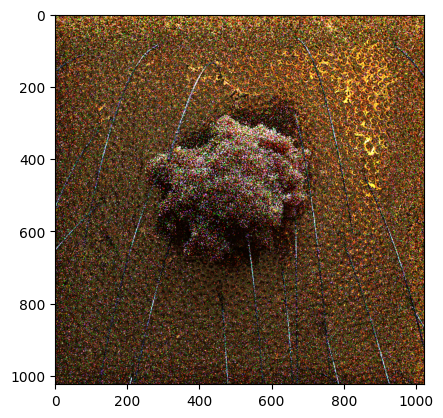

In [33]:
plt.imshow(ref_image)